# 1. Import library and data file

In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from mpl_toolkits.mplot3d import Axes3D # Plotting 3D graph

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

# importing data
train = pd.read_csv('COMP4433 Project/train.csv')
test = pd.read_csv('COMP4433 Project/test.csv')

In [2]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
train['SalePrice'].describe()


count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

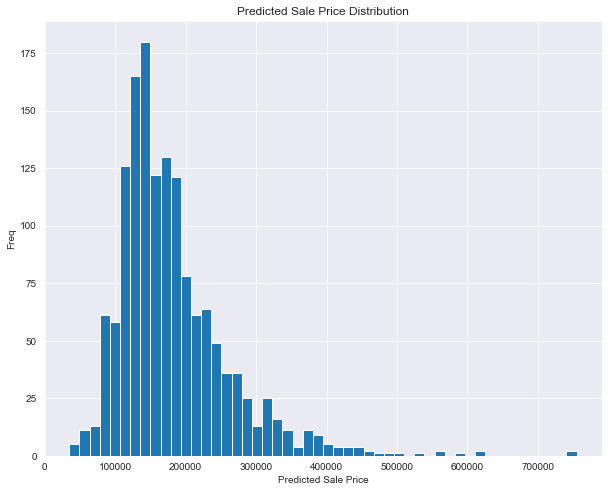

In [4]:
plt.figure(figsize=(10,8))
plt.hist(train['SalePrice'], bins=50)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Freq')
plt.title('Predicted Sale Price Distribution')

plt.show()

# 2. Data Preprocessing

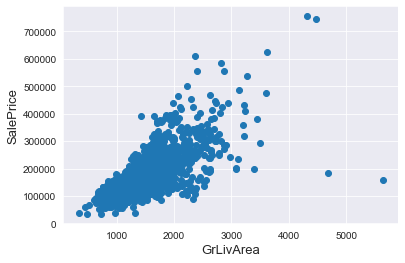

(2919, 80)

In [5]:

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

all_data = pd.concat((train, test),sort=True).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)



all_data.shape

In [6]:
# 1 refer to axis=1 (column)
all_data = all_data.drop('Id', 1)

## Handling Numerical features

In [7]:
#check numerical features
numeric_features = all_data.select_dtypes(include=[np.number])
print(numeric_features.columns)
len(numeric_features.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')


36

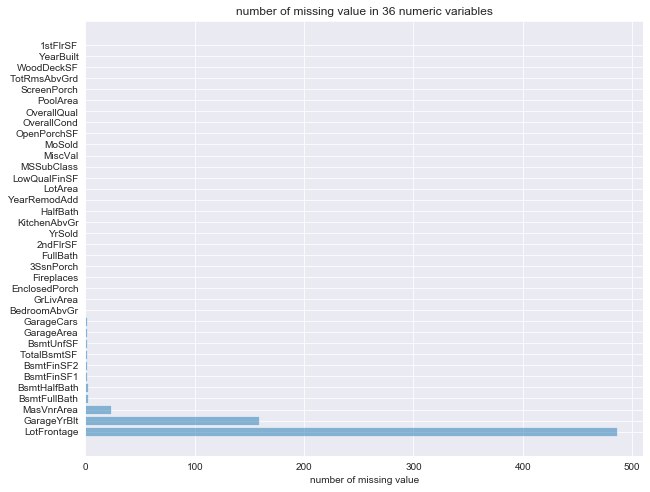

In [8]:
#show number of missing value in 36 numeric variables
nulls = pd.DataFrame(numeric_features.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'

y_pos = np.arange(len(nulls))

plt.figure(figsize=(10,8))
plt.barh(y_pos, nulls['Null Count'], align='center', alpha=0.5)
plt.yticks(y_pos, nulls.index)
plt.xlabel('number of missing value')
plt.title('number of missing value in 36 numeric variables')

plt.show()

In [9]:
# Use iterative imputer to impute
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(numeric_features)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, tol=0.001, verbose=0)

In [10]:
# fill the numeric features
numeric_features_filled = imp.transform(numeric_features)
# convert numpy array to dataframe
numeric_features_filled = pd.DataFrame(data = numeric_features_filled,columns = numeric_features.columns)

numeric_features_filled.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFullBath     0
BsmtHalfBath     0
BsmtUnfSF        0
EnclosedPorch    0
Fireplaces       0
FullBath         0
GarageArea       0
GarageCars       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
KitchenAbvGr     0
LotArea          0
LotFrontage      0
LowQualFinSF     0
MSSubClass       0
MasVnrArea       0
MiscVal          0
MoSold           0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PoolArea         0
ScreenPorch      0
TotRmsAbvGrd     0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
YrSold           0
dtype: int64

## Handling Categorical Features

In [11]:
# Find categorical features
categorical_features = all_data.select_dtypes(exclude=[np.number])
print(categorical_features.columns)
len(categorical_features.columns)

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')


43

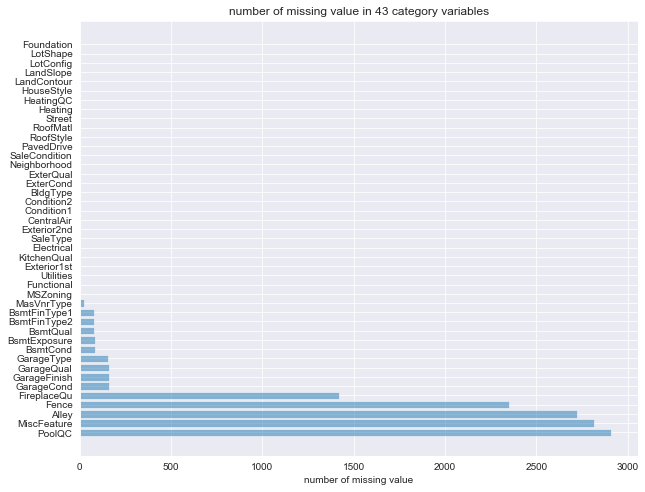

In [12]:
# show number of missing value in category variables
nulls = pd.DataFrame(categorical_features.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'

y_pos = np.arange(len(nulls))

plt.figure(figsize=(10,8))
plt.barh(y_pos, nulls['Null Count'], align='center', alpha=0.5)
plt.yticks(y_pos, nulls.index)
plt.xlabel('number of missing value')
plt.title('number of missing value in 43 category variables')

plt.show()

In [13]:
# make a copy
categorical_features_filled = categorical_features.copy()

In [14]:
categorical_features_filled["PoolQC"] = categorical_features_filled["PoolQC"].fillna("None")
categorical_features_filled["MiscFeature"] = categorical_features_filled["MiscFeature"].fillna("None")
categorical_features_filled["Alley"] = categorical_features_filled["Alley"].fillna("None")
categorical_features_filled["Fence"] = categorical_features_filled["Fence"].fillna("None")
categorical_features_filled["FireplaceQu"] = categorical_features_filled["FireplaceQu"].fillna("None")

In [15]:
categorical_features_filled = categorical_features_filled.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [16]:
categorical_features_filled.isnull().sum()


Alley            0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtQual         0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Foundation       0
Functional       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig        0
LotShape         0
MSZoning         0
MasVnrType       0
MiscFeature      0
Neighborhood     0
PavedDrive       0
PoolQC           0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
Street           0
Utilities        0
dtype: int64

# 3. Feature Engineering

## Apply Box Cox Transformation for Numeric Variables

In [17]:
skewed_feats = numeric_features_filled.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    numeric_features_filled_box = boxcox1p(numeric_features_filled, lam)

print(numeric_features_filled.head(5))
print(numeric_features_filled_box.head(5))



Skew in numerical features: 

There are 36 skewed numerical features to Box Cox transform
   1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0   856.000   854.000      0.000         3.000     706.000       0.000   
1  1262.000     0.000      0.000         3.000     978.000       0.000   
2   920.000   866.000      0.000         3.000     486.000       0.000   
3   961.000   756.000      0.000         3.000     216.000       0.000   
4  1145.000  1053.000      0.000         4.000     655.000       0.000   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  OverallCond  \
0         1.000         0.000    150.000          0.000  ...        5.000   
1         0.000         1.000    284.000          0.000  ...        8.000   
2         1.000         0.000    434.000          0.000  ...        5.000   
3         1.000         0.000    540.000        272.000  ...        5.000   
4         1.000         0.000    490.000          0.000  ...        5.000   

 

## Apply One Hot Encoding to Categorical Features 

In [18]:
from sklearn.preprocessing import OneHotEncoder

# convert to string
categorical_features_filled = categorical_features_filled.apply(lambda x:x.astype(str))

# Create the encoder.
onehot = pd.get_dummies(categorical_features_filled,drop_first=True)

onehot.head(3)

,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [19]:
all_data_processed = pd.concat([numeric_features_filled_box, onehot], axis=1)
all_data_processed.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,11.693,11.686,0.000,1.541,11.170,0.000,0.730,0.000,7.483,0.000,...,0,0,0,0,0,0,0,1,1,0
1,12.792,0.000,0.000,1.541,12.063,0.000,0.000,0.730,8.898,0.000,...,0,0,0,0,0,0,0,1,1,0
2,11.892,11.725,0.000,1.541,10.200,0.000,0.730,0.000,9.917,0.000,...,0,0,0,0,0,0,0,1,1,0
3,12.014,11.354,0.000,1.541,8.274,0.000,0.730,0.000,10.468,8.798,...,0,0,0,0,0,0,0,1,1,0
4,12.511,12.271,0.000,1.820,10.971,0.000,0.730,0.000,10.221,0.000,...,0,0,0,0,0,0,0,1,1,0


In [20]:
train_processed = all_data_processed[:ntrain]
test_processed = all_data_processed[ntrain:]

# 4. Modelling
Remark:
<br>
fit(train_processed, y_train)
<br>
predict(test_processed)

In [21]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from joblib import dump, load
k_fold = model_selection.KFold(n_splits=5, random_state=123)
X = train_processed
Y = y_train

In [22]:
from sklearn.ensemble import RandomForestRegressor


## Construct Grid Search CV 

In [23]:
# set grid search parameter value
max_features = [i*0.1 for i in range(5, 7, 1)]
max_depth = [i for i in range(10, 100, 40)]
max_leaf_nodes = [10, 100, 1000]
n_estimators = [i for i in range(50, 100, 10)]

print(max_features)
print(max_depth)
print(max_leaf_nodes)
print(n_estimators)

[0.5, 0.6000000000000001]
[10, 50, 90]
[10, 100, 1000]
[50, 60, 70, 80, 90]


In [24]:
# Check if object exist
try:
    load('RF.joblib') 
except FileNotFoundError:
    print("The model is not exist, now create & save model")
    
    from sklearn.ensemble import RandomForestRegressor

    
    rf_grid = {'max_features': max_features, 'max_depth': max_depth,
              'max_leaf_nodes': max_leaf_nodes, 'n_estimators': n_estimators}
    rf_model = GridSearchCV( RandomForestRegressor(),
                             rf_grid, cv=k_fold, scoring='neg_mean_squared_log_error',
                             return_train_score=True, n_jobs=-1)
    rf_model.fit(X,Y)
    # Save model in current folder 
    dump(rf_model, 'RF.joblib')
else:
    rf_model = load('RF.joblib')
    print("Reload existing model")

print('------------------------------------------------------------')
print('Model Summary:')
print(rf_model.fit)

The model is not exist, now create & save model
------------------------------------------------------------
Model Summary:
<bound method BaseSearchCV.fit of GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                              

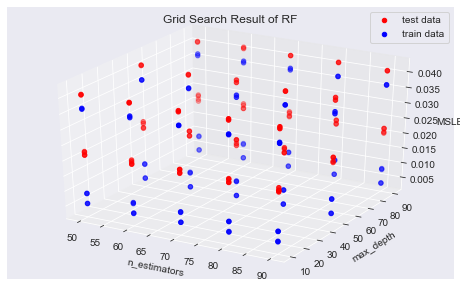

In [25]:
X_axis = rf_model.cv_results_['param_n_estimators'].data
Y_axis = rf_model.cv_results_['param_max_depth'].data
test_axis = abs(rf_model.cv_results_['mean_test_score'])
train_axis= abs(rf_model.cv_results_['mean_train_score'])

plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')
ax.scatter(X_axis, Y_axis, test_axis, c='red', label='test data')
ax.scatter(X_axis, Y_axis, train_axis, c='blue', label='train data')

plt.title('Grid Search Result of RF')
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('MSLE')
ax.legend();

In [26]:
# print the mean test score
print(test_axis)

[0.04072179 0.04082328 0.04053426 0.04105495 0.04130339 0.02255225
 0.0220335  0.02239177 0.02214585 0.02165145 0.0213847  0.02123347
 0.02141642 0.02114962 0.02108772 0.04055512 0.04064544 0.04090196
 0.04065752 0.04073181 0.02227217 0.02259806 0.02244699 0.02237921
 0.02243914 0.02139494 0.0213858  0.02117013 0.02127029 0.02142275
 0.04135632 0.0406183  0.04152557 0.0406587  0.04116614 0.02289854
 0.02244257 0.02237049 0.02210604 0.02217711 0.02096769 0.02092945
 0.02109531 0.0208704  0.02048156 0.04117825 0.0408191  0.04074113
 0.04051377 0.04032831 0.02233196 0.0224088  0.02223774 0.02252136
 0.02214805 0.02069921 0.02085126 0.02044538 0.02087714 0.02085647
 0.04046108 0.04115694 0.04082807 0.04097391 0.04089888 0.02245627
 0.02190182 0.02232311 0.02220752 0.02213793 0.02074477 0.02084033
 0.02095299 0.02087543 0.02055688 0.04070176 0.04072096 0.04085471
 0.04111725 0.04079078 0.0228437  0.02242091 0.02188105 0.02205268
 0.02202954 0.02139244 0.0208405  0.02067538 0.02100646 0.0209

In [27]:
# print the best estimator summary 
print('MSLE in:')
print('Test Data:',abs(rf_model.cv_results_['mean_test_score'][rf_model.best_index_]))
print('Train Data:',abs(rf_model.cv_results_['mean_train_score'][rf_model.best_index_]))
print('------------------------------------------------------------')
print('Parameters:')
print('max_features:',rf_model.cv_results_['param_max_features'][rf_model.best_index_])
print('param_max_depth:',rf_model.cv_results_['param_max_depth'][rf_model.best_index_])
print('max_leaf_nodes:',rf_model.cv_results_['param_max_leaf_nodes'][rf_model.best_index_])
print('param_n_estimators:',rf_model.cv_results_['param_n_estimators'][rf_model.best_index_])

MSLE in:
Test Data: 0.020445381173809056
Train Data: 0.003606418729153768
------------------------------------------------------------
Parameters:
max_features: 0.6000000000000001
param_max_depth: 50
max_leaf_nodes: 1000
param_n_estimators: 70


In [28]:
# print CV results
rf_model.cv_results_

{'mean_fit_time': array([0.42007637, 0.49627156, 0.58343806, 0.67559175, 0.77406864,
        0.86509233, 1.06614599, 1.24855876, 1.57555418, 1.91506901,
        1.18972106, 1.3837965 , 1.61337156, 1.82026706, 2.16207223,
        0.59632359, 0.6293396 , 0.73131332, 0.85799479, 0.94946032,
        1.09068184, 1.31169052, 1.54726949, 1.77620978, 2.00647378,
        1.35119696, 1.64266019, 2.11457415, 2.36551247, 2.77388721,
        0.52132092, 0.62074904, 0.69214706, 0.75240798, 0.85553341,
        0.98401384, 1.24727621, 1.48223877, 1.60324244, 1.822861  ,
        1.78882751, 2.17956777, 2.49233031, 2.94831004, 3.17310777,
        0.57466187, 0.67040563, 0.78011265, 0.88682618, 0.97898026,
        1.198592  , 1.4321682 , 1.67252464, 2.06910338, 2.3120223 ,
        2.19416685, 2.5459897 , 3.0879457 , 3.73475566, 3.85206165,
        0.52243767, 0.60471268, 0.70084047, 0.79108262, 0.87585635,
        1.00630732, 1.21117663, 1.4229569 , 1.67507248, 1.90185843,
        1.76925263, 2.14986634,

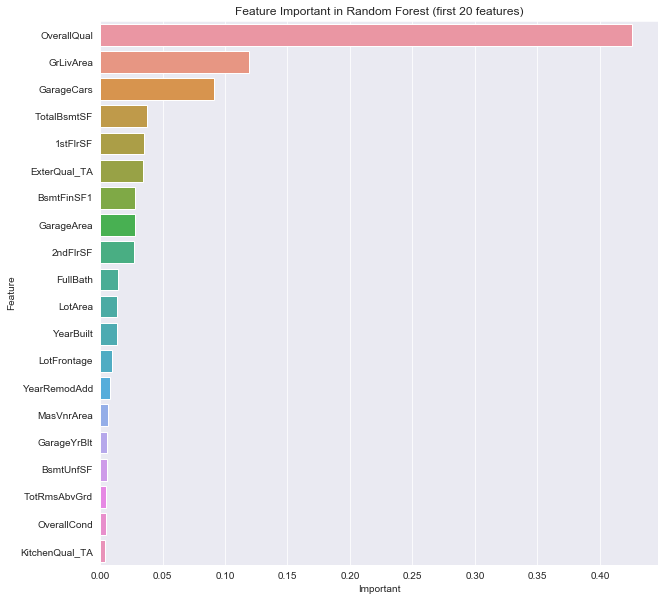

In [29]:
plt.figure(figsize=(10,10))

d = {'featuresName': X.columns, 'featureImportances': rf_model.best_estimator_.feature_importances_}
temp = pd.DataFrame(data=d)
temp = temp.sort_values(by=['featureImportances'],ascending=False)


newtemp = temp[0:20]


sns.barplot(y=newtemp['featuresName'],x=newtemp['featureImportances'])

plt.title('Feature Important in Random Forest (first 20 features)')
plt.xlabel('Important')
plt.ylabel('Feature');

# 5. Predict Testing Data and Generate csv file

In [30]:
# make prediction on testing data
y_pred = rf_model.predict(test_processed)

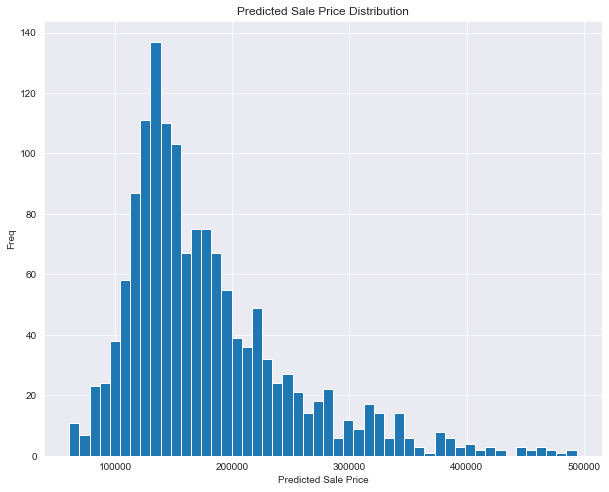

In [31]:
# print predicted sale price distribution
plt.figure(figsize=(10,8))
plt.hist(y_pred, bins=50)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Freq')
plt.title('Predicted Sale Price Distribution')

plt.show()


In [32]:
# final submission
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = y_pred
sub.to_csv('RF-new.csv',index=False)